
Spin efficiency is defined as the percent of the spin vector $\mathbf{s}$ that projects to the plane orthogonal to direction of pitch $\mathbf{d}$ relative to total spin. Although $\mathbf{s}$ is static, $\mathbf{d}$ changes over the flight of a pitch, therefore spin efficiency changes over the flight of the pitch. How do we calculate spin efficiency at any point in time? 

1. Calculate the projection of $\mathbf{s}$  onto $\mathbf{d}$ :
   $$
   \text{proj}_{\mathbf{d}} \mathbf{s} = \frac{\mathbf{s} \cdot \mathbf{d}}{\mathbf{d} \cdot \mathbf{d}} \mathbf{d}
   $$

2. Find the orthogonal component of $\mathbf{s}$ relative to $\mathbf{d}$:
   $$
   \mathbf{s}_{\text{ortho}} = \mathbf{s} - \text{proj}_{\mathbf{d}} \mathbf{s}
   $$

3. Compute the percentage that magnitude of $\mathbf{s}_{\text{ortho}}$ represents  of $\mathbf{s}$'s magnitude:
   $$
   \text{percentage} = \left(\frac{\|\mathbf{s}_{\text{ortho}}\|}{\|\mathbf{s}\|}\right) \times 100
   $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# vectorized function to be used later that calculates spin efficiency over an array of direciton vectors
def calc_spin_eff_array(d, s):

    d = np.asarray(d)
    s = np.asarray(s)
    
    # gets dot product for each row
    dot_sd = np.einsum('ij,ij->i', s, d)
    dot_dd = np.einsum('ij,ij->i', d, d)
    
    # projection of s onto d
    proj_sd = np.einsum('i,ij->ij', (dot_sd / dot_dd), d)
    
    # calculate the orthogonal component of s to d for each vector pair
    s_ortho = s - proj_sd
    
    # calculate magnitudes of s and s_ortho for each vector pair
    mag_s = np.linalg.norm(s, axis=1)
    mag_s_ortho = np.linalg.norm(s_ortho, axis=1)
    
    # convert to spin_eff for each vector pair
    spin_eff = (mag_s_ortho / mag_s) * 100
    
    return spin_eff


Text(0.5, 1.0, 'perfect gryoball')

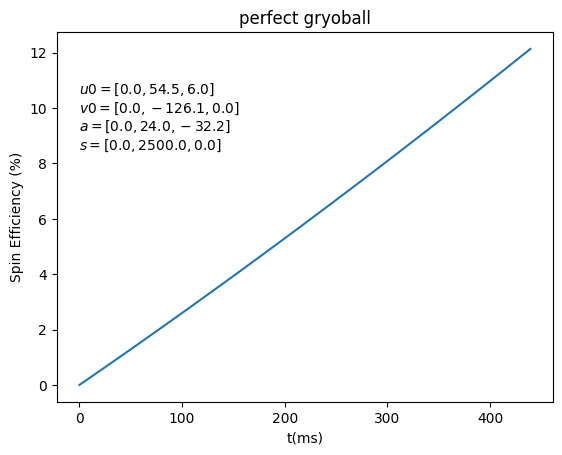

In [34]:
# constant acceleration params
# #init position vector, init velo vector, acceleraton vector
u0 = np.array([0,60.5-6,6])
v0 = np.array([0,-126.13,0])
a = np.array([0,24.0,-32.17405])

# spin vector (rpm)
s = np.array([0,2500.0,0])

# plate time
plate_t = (-v0[1] - np.sqrt(v0[1]**2 - 2*a[1]*(u0[1]-17/12)))/a[1]

# time point vector
n_tpts = 50
t = np.linspace(0,plate_t,n_tpts) # timepoints 
frac_traj = t/plate_t # fraction of trajectory

# matrix of velo vectors across trajectory
# 3xN_timepoints
vt = v0[None,:] + a[None,:]*t[:,None]

# spin efficiency over time
# N_timepoints
spin_eff_t = calc_spin_eff_array(vt,s[None,:])

# position matrix 
# #3xN_timepoints
pt = u0[None,:] + v0[None,:]*t[:,None] + .5*a[None,:]*t[:,None]**2

fix,axes = plt.subplots(1,1)

axes.plot(1000*t,spin_eff_t)

axes.set_xlabel('t(ms)')
axes.set_ylabel('Spin Efficiency (%)')

u_vector_text = '$u0 = [{0},{1},{2}] $'.format(np.round(u0[0],1),np.round(u0[1],1),np.round(u0[2],1))
v_vector_text = '$v0 = [{0},{1},{2}] $'.format(np.round(v0[0],1),np.round(v0[1],1),np.round(v0[2],1))
a_vector_text = '$a = [{0},{1},{2}] $'.format(np.round(a[0],1),np.round(a[1],1),np.round(a[2],1))
s_vector_text = '$s = [{0},{1},{2}] $'.format(np.round(s[0],0),np.round(s[1],0),np.round(s[2],0))

axes.text(0, (spin_eff_t.max() - spin_eff_t.min()) * .7 + spin_eff_t.min(), '{0}\n{1}\n{2}\n{3}'.format(u_vector_text,v_vector_text,a_vector_text,s_vector_text), fontsize = 10)
plt.title('perfect gryoball')


Text(0.5, 1.0, 'perfect sidespin curve')

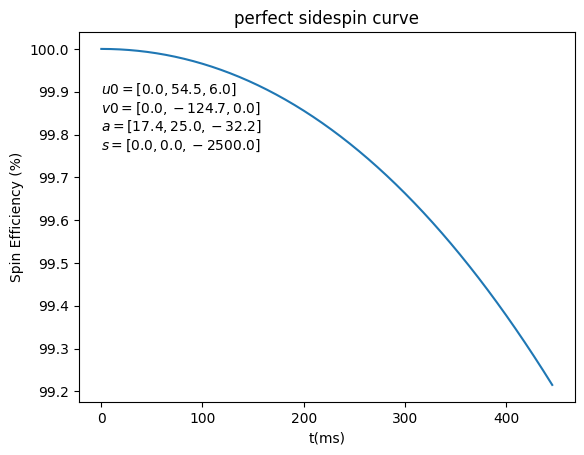

In [32]:
# constant acceleration params
# #init position vector, init velo vector, acceleraton vector
u0 = np.array([0,60.5-6,6])
v0 = np.array([0,-1.46667 * 85,0])
a = np.array([17.354762 ,25,-32.17405 ])

# spin vector (rpm)
s = np.array([0,0,-2500.0])

# plate time
plate_t = (-v0[1] - np.sqrt(v0[1]**2 - 2*a[1]*(u0[1]-17/12)))/a[1]

# time point vector
n_tpts = 50
t = np.linspace(0,plate_t,n_tpts) # timepoints 
frac_traj = t/plate_t # fraction of trajectory

# matrix of velo vectors across trajectory
# 3xN_timepoints
vt = v0[None,:] + a[None,:]*t[:,None]

# spin efficiency over time
# N_timepoints
spin_eff_t = calc_spin_eff_array(vt,s[None,:])

# position matrix 
# #3xN_timepoints
pt = u0[None,:] + v0[None,:]*t[:,None] + .5*a[None,:]*t[:,None]**2
fix,axes = plt.subplots(1,1)

axes.plot(1000*t,spin_eff_t)

axes.set_xlabel('t(ms)')
axes.set_ylabel('Spin Efficiency (%)')

u_vector_text = '$u0 = [{0},{1},{2}] $'.format(np.round(u0[0],1),np.round(u0[1],1),np.round(u0[2],1))
v_vector_text = '$v0 = [{0},{1},{2}] $'.format(np.round(v0[0],1),np.round(v0[1],1),np.round(v0[2],1))
a_vector_text = '$a = [{0},{1},{2}] $'.format(np.round(a[0],1),np.round(a[1],1),np.round(a[2],1))
s_vector_text = '$s = [{0},{1},{2}] $'.format(np.round(s[0],0),np.round(s[1],0),np.round(s[2],0))

axes.text(0, (spin_eff_t.max() - spin_eff_t.min()) * .7 + spin_eff_t.min(), '{0}\n{1}\n{2}\n{3}'.format(u_vector_text,v_vector_text,a_vector_text,s_vector_text), fontsize = 10)
plt.title('perfect sidespin curve')

In [9]:

def calc_spin_eff(d, s):
    dot_sd = np.dot(s, d)
    dot_dd = np.dot(d, d)
    
    # projection of s onto d
    proj_sd = (dot_sd / dot_dd) * d
    
    # calculate the orthogonal component of s to d
    s_ortho = s - proj_sd
    
    # magnitudes of s and s_ortho
    mag_s = np.linalg.norm(s)
    mag_s_ortho = np.linalg.norm(s_ortho)
    
    # convert to spin_eff
    spin_eff = (mag_s_ortho / mag_s) * 100
    return spin_eff
